In [14]:
import os
import sys
import pandas as pd
import numpy as np
from utils.dataset import *
import matplotlib.pyplot as plt
from scipy.stats import entropy
from tqdm import tqdm

In [15]:
pairs = 1000
pairdata, freqpairs, n_size, n_interval = get_univ_data(pairs)
sizedata = get_data(pairdata, freqpairs, 'size_index', n_size)

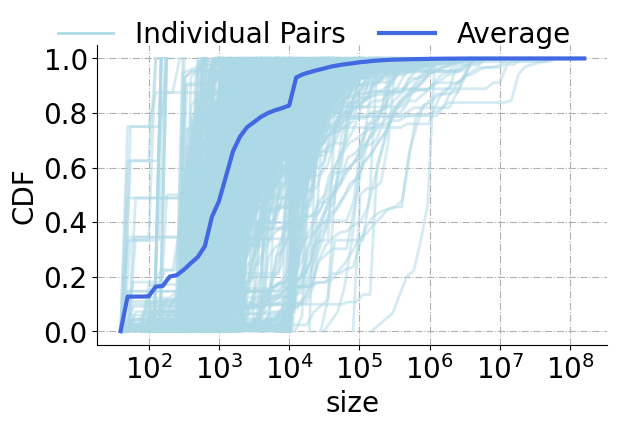

In [41]:
fig = plt.figure(figsize=(6, 4))
plt.subplots_adjust(left=0.15, top=0.95, bottom=0.2, right=1.0)
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(2, 9, 1))
ax.set_xticklabels(["$10^%d$" % i for i in np.arange(2, 9, 1)], fontsize=20)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels(["%.1f"% i for i in np.arange(0, 1.1, 0.2)], fontsize=20)
ax.set_ylabel('CDF', fontsize=20)
ax.set_xlabel('size', fontsize=20)
plt.grid(linestyle='-.')

size = np.log10(pairdata[freqpairs[0]]['size'].values)
bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
counts, bins = np.histogram(size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=1.0, label='Individual Pairs')
for i in range(1, pairs):
    size = np.log10(pairdata[freqpairs[i]]['size'].values)
    bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
    counts, bins = np.histogram(size, bins)
    cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
    plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=0.5)

all_size = []
for i in range(pairs):
    all_size.extend(list(pairdata[freqpairs[i]]['size'].values))
all_size = np.log10(all_size)
bins = np.arange(np.min(all_size) - 0.1, np.max(all_size) + 0.1, 0.1)
counts, bins = np.histogram(all_size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=3, color='RoyalBlue', label='Average')
plt.legend(fontsize=20, frameon=False, loc=(-0.1, 0.95), ncol=2, columnspacing=1.2, labelspacing=0)

plt.savefig('figure/univ-size-cdf.pdf', dpi=400)

In [31]:
grams = {}
for i in [2, 3, 4]:
    grams[i] = np.zeros((pairs, n_size ** i))
    for pair in range(pairs):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += sizeindex[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        grams[i][pair][values] = counts
    grams[i] /= grams[i].sum(axis=1).reshape(-1, 1)

In [32]:
he_grams = {}
for i in [2, 3, 4]:
    he_grams[i] = np.zeros((pairs, n_size ** i))
    for pair in range(pairs):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        he_size_seq = np.random.permutation(sizeindex)
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += he_size_seq[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        he_grams[i][pair][values] = counts
    he_grams[i] /= he_grams[i].sum(axis=1).reshape(-1, 1)

In [5]:
def JSD(p, q):
    p = list(p)
    q = list(q)
    pq_max_len = max(len(p), len(q))
    p += [0.0] * (pq_max_len - len(p))
    q += [0.0] * (pq_max_len - len(q))
    assert (len(p) == len(q))
    m = np.sum([p, q], axis=0) / 2
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [34]:
jsds = {}
for i in range(2, 5):
    jsds[i] = []    
    for pair in tqdm(range(pairs)):
        jsds[i].append(JSD(grams[i][pair], he_grams[i][pair]))

100%|██████████| 1000/1000 [03:39<00:00,  4.55it/s]


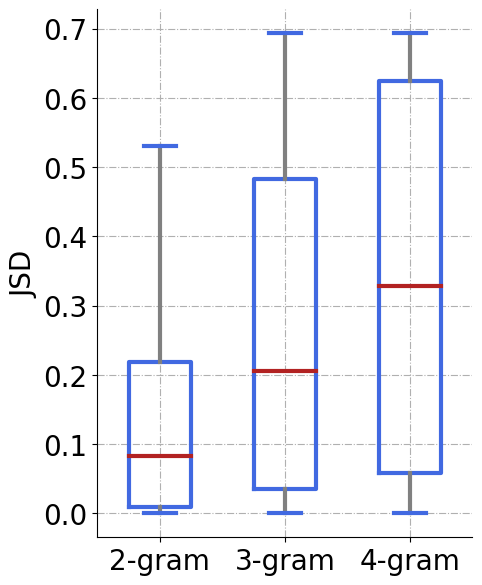

In [42]:
plt.figure(figsize=(5, 6))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0.2, top=0.98, bottom=0.1, right=0.95)
plt.boxplot([jsds[2], jsds[3], jsds[4]], labels=['2-gram', '3-gram', '4-gram'], showfliers=False, widths=0.5, boxprops={'color': 'RoyalBlue', 'linewidth': 3},
medianprops={'color': 'FireBrick', 'linewidth': 3}, capprops={'color': 'RoyalBlue', 'linewidth': 3}, whiskerprops={'color': 'Gray', 'linewidth': 3},
flierprops={'markersize': 12})
plt.ylabel('JSD', fontsize=20, rotation=90)
plt.grid(linestyle='-.')
plt.yticks(np.arange(0, 0.8, 0.1), fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('figure/univ-grams.pdf', dpi=400)
# plt.savefig('figure/fb-grams.png', bbox_inches='tight')

In [44]:
pairs = 5000
pairdata, freqpairs, n_size, n_interval = get_fb_data(pairs)
sizedata = get_data(pairdata, freqpairs, 'size_index', n_size)

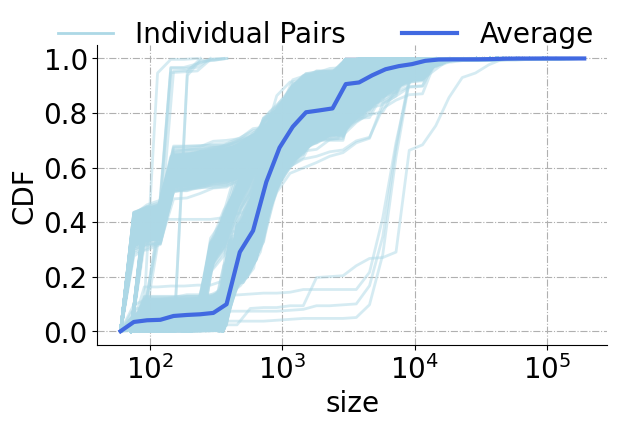

In [45]:
fig = plt.figure(figsize=(6, 4))
plt.subplots_adjust(left=0.15, top=0.95, bottom=0.2, right=1.0)
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(2, 9, 1))
ax.set_xticklabels(["$10^%d$" % i for i in np.arange(2, 9, 1)], fontsize=20)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_yticklabels(["%.1f"% i for i in np.arange(0, 1.1, 0.2)], fontsize=20)
ax.set_ylabel('CDF', fontsize=20)
ax.set_xlabel('size', fontsize=20)
plt.grid(linestyle='-.')

size = np.log10(pairdata[freqpairs[0]]['size'].values)
bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
counts, bins = np.histogram(size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=1.0, label='Individual Pairs')
for i in range(1, pairs):
    size = np.log10(pairdata[freqpairs[i]]['size'].values)
    bins = np.arange(np.min(size) - 0.1, np.max(size) + 0.1, 0.1)
    counts, bins = np.histogram(size, bins)
    cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
    plt.plot(bins[1:], cdf, linewidth=2, color='LightBlue', alpha=0.5)

all_size = []
for i in range(pairs):
    all_size.extend(list(pairdata[freqpairs[i]]['size'].values))
all_size = np.log10(all_size)
bins = np.arange(np.min(all_size) - 0.1, np.max(all_size) + 0.1, 0.1)
counts, bins = np.histogram(all_size, bins)
cdf = np.cumsum(counts) / np.cumsum(counts)[-1]
plt.plot(bins[1:], cdf, linewidth=3, color='RoyalBlue', label='Average')
plt.legend(fontsize=20, frameon=False, loc=(-0.1, 0.95), ncol=2)


plt.savefig('figure/fb-size-cdf.png', dpi=400)

In [46]:
grams = {}
for i in [2, 3, 4]:
    grams[i] = np.zeros((pairs, n_size ** i))
    for pair in tqdm(range(pairs)):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += sizeindex[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        grams[i][pair][values] = counts
    grams[i] /= grams[i].sum(axis=1).reshape(-1, 1)

he_grams = {}
for i in [2, 3, 4]:
    he_grams[i] = np.zeros((pairs, n_size ** i))
    for pair in tqdm(range(pairs)):
        sizeindex = pairdata[freqpairs[pair]]['size_index'].values
        he_size_seq = np.random.permutation(sizeindex)
        l = len(sizeindex) - i + 1
        feature = np.zeros(l, dtype=int)
        for j in range(i):
            feature += he_size_seq[j:j+l] * n_size ** (i - j - 1)
        values, counts = np.unique(feature, return_counts=True)
        he_grams[i][pair][values] = counts
    he_grams[i] /= he_grams[i].sum(axis=1).reshape(-1, 1)

100%|██████████| 5000/5000 [00:00<00:00, 5312.37it/s]


In [47]:
jsds = {}
for i in range(2, 5):
    jsds[i] = []    
    for pair in tqdm(range(pairs)):
        jsds[i].append(JSD(grams[i][pair], he_grams[i][pair]))

 12%|█▏        | 621/5000 [02:18<16:54,  4.32it/s]

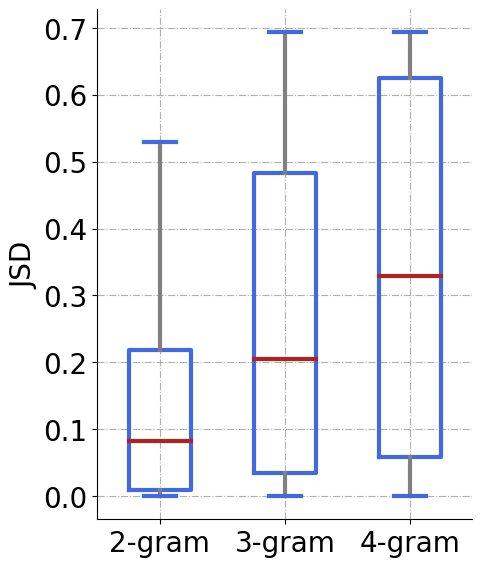

In [38]:
plt.figure(figsize=(5, 6))
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(left=0.2, top=0.95, bottom=0.1, right=0.95)
plt.boxplot([jsds[2], jsds[3], jsds[4]], labels=['2-gram', '3-gram', '4-gram'], showfliers=False, widths=0.5, boxprops={'color': 'RoyalBlue', 'linewidth': 3},
medianprops={'color': 'FireBrick', 'linewidth': 3}, capprops={'color': 'RoyalBlue', 'linewidth': 3}, whiskerprops={'color': 'Gray', 'linewidth': 3},
flierprops={'markersize': 12})
plt.ylabel('JSD', fontsize=20, rotation=90)
plt.grid(linestyle='-.')
plt.yticks(np.arange(0, 0.8, 0.1), fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('figure/fb-grams.pdf', dpi=400)
# plt.savefig('figure/fb-grams.png', bbox_inches='tight')